<a href="https://colab.research.google.com/github/jayadipti/Muthoot-Youth-Connect/blob/main/AI_integrated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI-Based Facial Recognition for Customer Check-In

In [ ]:
import cv2
!pip install mediapipe
import mediapipe as mp
import numpy as np


mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

def main():

    cap = cv2.VideoCapture(0)


    if not cap.isOpened():
        raise IOError("Cannot open webcam")


    with mp_face_detection.FaceDetection(
        model_selection=0,
        min_detection_confidence=0.5) as face_detection:

        while True:

            ret, frame = cap.read()
            if not ret:
                print("Failed to grab frame")
                break

            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


            results = face_detection.process(frame_rgb)

            if results.detections:
                for detection in results.detections:

                    bbox = detection.location_data.relative_bounding_box
                    h, w, _ = frame.shape


                    x = int(bbox.xmin * w)
                    y = int(bbox.ymin * h)
                    width = int(bbox.width * w)
                    height = int(bbox.height * h)


                    cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)


                    cv2.putText(frame, f"Face", (x, y - 10),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


            cv2.imshow('Face Detection', frame)


            if cv2.waitKey(1) & 0xFF == ord('q'):
                break


    cap.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"Error occurred: {str(e)}")
        from IPython.display import HTML, Javascript, display
from google.colab import output

def video_stream():
  js = Javascript('''
    async function startStreaming() {

    }

    async function takePhoto() {

    }

    async function requestWebcamAccess() {
      try {
        await navigator.mediaDevices.getUserMedia({ video: true });
        google.colab.kernel.invokeFunction('notebook.permissionGranted', [], {});
        return true;
      } catch (error) {
        console.error('Webcam access denied:', error);
        return false;
      }
    }

    requestWebcamAccess();
  ''')
  display(js)


output.register_callback('notebook.permissionGranted', lambda: print("Webcam access granted!"))

def js_to_image(js_reply):
  """
  Converts a Javascript base64 image data URI to a NumPy image.
  """
  from io import BytesIO
  import base64
  from PIL import Image

  image_bytes = base64.b64decode(js_reply.split(',')[1])
  image = Image.open(BytesIO(image_bytes))
  return np.array(image)

video_stream()


captured_image_data = eval_js('takePhoto()')
if captured_image_data:
  img = js_to_image(captured_image_data)
  cv2.imshow("Captured Frame", img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()



Error occurred: Cannot open webcam


<IPython.core.display.Javascript object>

Webcam access granted!


<IPython.core.display.Javascript object>

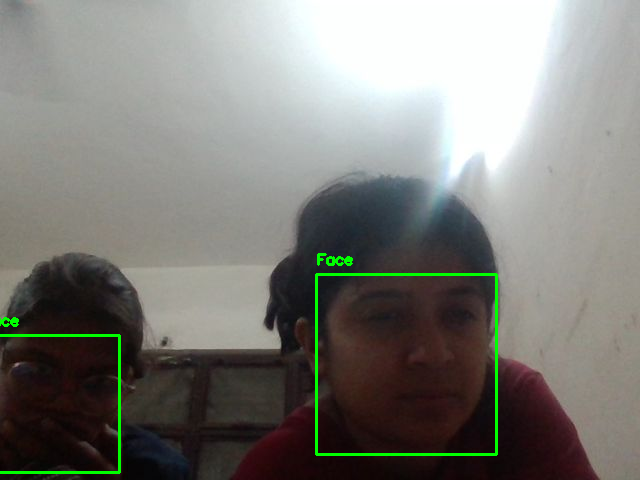

<IPython.core.display.Javascript object>

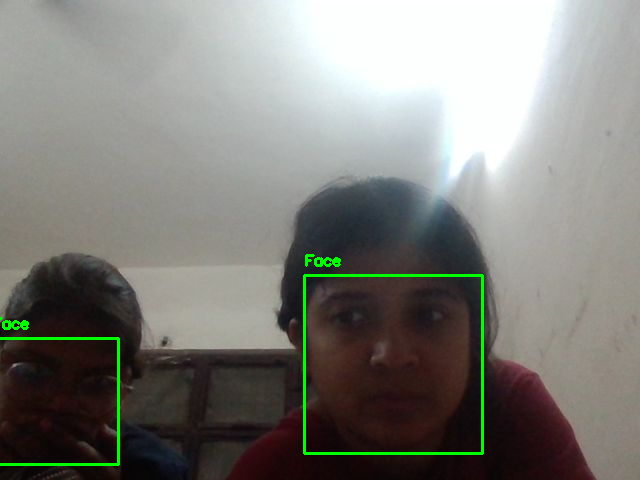

<IPython.core.display.Javascript object>

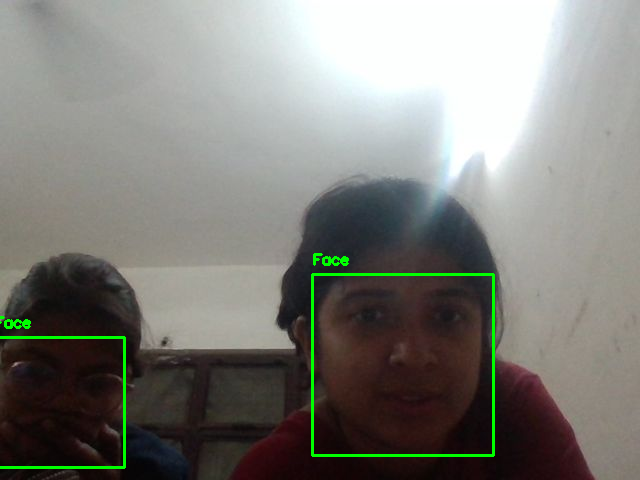

<IPython.core.display.Javascript object>

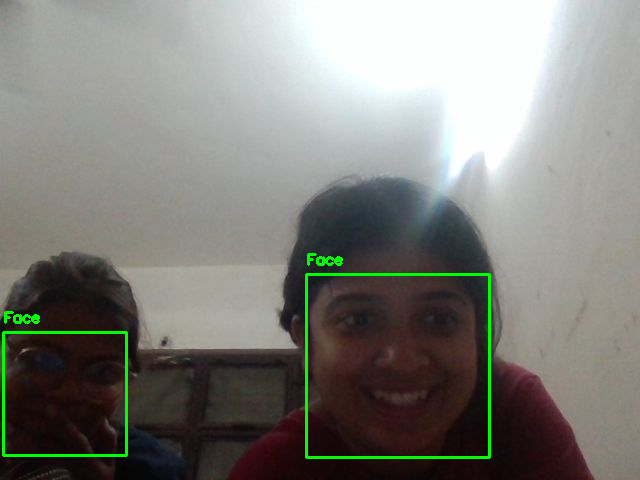

<IPython.core.display.Javascript object>

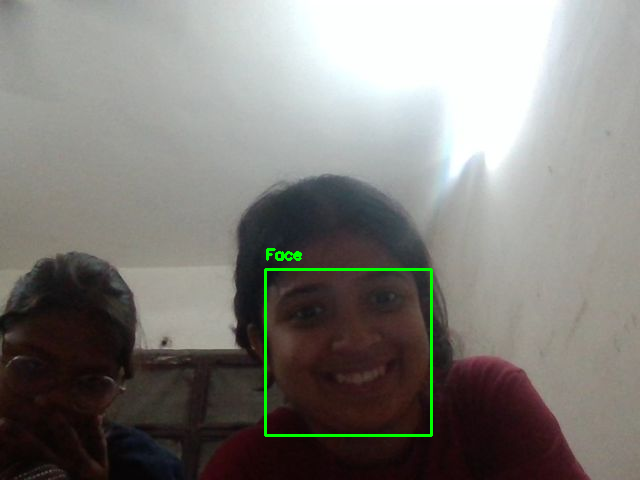

<IPython.core.display.Javascript object>

In [ ]:
!pip install mediapipe
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
import io
from PIL import Image

def video_stream():
    """JavaScript to capture video from webcam."""
    js = """
    async function getVideoFrame() {
        const video = document.createElement('video');
        video.style.display = 'none';
        document.body.appendChild(video);

        const stream = await navigator.mediaDevices.getUserMedia({ video: true });
        video.srcObject = stream;
        await video.play();

        const canvas = document.createElement('canvas');
        const ctx = canvas.getContext('2d');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        ctx.drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        document.body.removeChild(video);
        return canvas.toDataURL('image/jpeg', 0.8);
    }
    """
    display(Javascript(js))
    return eval_js('getVideoFrame()')

def base64_to_image(base64_str):
    """Convert base64 string to OpenCV image."""
    image_data = base64.b64decode(base64_str.split(',')[1])
    image = Image.open(io.BytesIO(image_data))
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

def detect_faces():
    """Detect faces using MediaPipe."""
    mp_face_detection = mp.solutions.face_detection
    mp_drawing = mp.solutions.drawing_utils

    with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
        while True:
            frame_data = video_stream()
            if not frame_data:
                print("No frame received")
                break

            frame = base64_to_image(frame_data)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = face_detection.process(frame_rgb)

            if results.detections:
                for detection in results.detections:
                    bbox = detection.location_data.relative_bounding_box
                    h, w, _ = frame.shape
                    x, y = int(bbox.xmin * w), int(bbox.ymin * h)
                    width, height = int(bbox.width * w), int(bbox.height * h)

                    cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)
                    cv2.putText(frame, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            cv2_imshow(frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

detect_faces()


AI Queue Assignment (Python - Flask API)

In [ ]:
!pip install flask flask-ngrok
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import heapq
import random
from textblob import TextBlob
import os




class Customer:
    def __init__(self, id, priority):
        self.id = id
        self.priority = priority
        self.timestamp = random.randint(1, 1000)

    def __lt__(self, other):
        if self.priority == other.priority:
            return self.timestamp < other.timestamp
        return self.priority < other.priority

queue = []
content = [
    {"type": "text", "message": "Welcome to Muthoot Finance!"},
    {"type": "offer", "message": "Gold Loan at just 7.5% interest!"},
    {"type": "tip", "message": "Did you know? Investing in gold is a great hedge against inflation."}
]


app = Flask(__name__)

@app.route('/')
def display_content():
    return render_template('screen.html', content=content)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
